#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [47]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 6.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.ones(4,3)
Y=torch.ones(4,3)
print('#행으로 병합 : \n', torch.cat([X,Y], 1))
print('#열로 병합 : \n', torch.cat([X,Y], 0))

#행으로 병합 : 
 tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
#열로 병합 : 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [19]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 524 kB/s 
     |████████████████████████████████| 11.2 MB 17.2 MB/s 
     |████████████████████████████████| 15.7 MB 47.3 MB/s 
     |████████████████████████████████| 9.9 MB 32.7 MB/s 
     |████████████████████████████████| 61 kB 7.5 MB/s 
     |████████████████████████████████| 944 kB 42.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.8305, -1.9585]) 
label: tensor([5.9397])


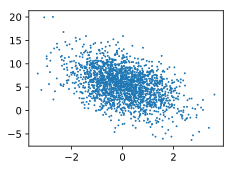

In [10]:
# Visualization
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(), 1);

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [17]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7304, -1.0463],
        [-0.7284,  0.4334],
        [ 0.5900, -0.0386],
        [ 1.3883,  0.5101],
        [ 2.0868,  0.0415],
        [ 0.9686,  1.3036],
        [ 0.5305,  0.1572],
        [ 0.2262,  1.1003],
        [-0.9632, -1.4831],
        [ 0.2670, -0.7338],
        [-1.0775, -0.3139],
        [-0.4327, -0.4333],
        [-0.4066,  1.0697],
        [ 1.0072, -0.7052],
        [-1.6822, -1.0819],
        [ 0.6914, -0.8661],
        [-0.7532, -1.6595],
        [ 2.5994, -2.3189],
        [ 1.2907,  1.0688],
        [-0.1904,  0.3280]]) 
 tensor([[ 9.2605],
        [ 2.6664],
        [ 7.3327],
        [ 8.8870],
        [11.6928],
        [ 6.4523],
        [ 6.8496],
        [ 4.5256],
        [ 4.8480],
        [ 7.4007],
        [ 2.7444],
        [ 4.8432],
        [ 2.6869],
        [ 9.5643],
        [ 2.0688],
        [ 8.8673],
        [ 5.7362],
        [16.7986],
        [ 7.7709],
        [ 4.4281]])


In [28]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [21]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b

In [22]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape)) ** 2 / 2

In [23]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.044350
epoch 2, loss 0.000149
epoch 3, loss 0.000051


In [66]:
torch.tensor(true_b)

tensor(5.5000)

In [42]:
features[:,0]

tensor([-0.8305, -1.6883,  0.2563,  ..., -0.1476, -0.8324,  0.0946])

In [30]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 1.7548e-04, -6.1154e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0005], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [55]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


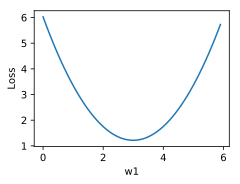

In [76]:
# plot1
w_list = []
mse_list = []
for w in np.arange(0.0, true_w[0]+3, 0.1):
  l_sum = 0
  for x, y in zip(features[:,0], labels):
    l_sum += loss(np.dot(x, w)+true_b, torch.tensor(y))
  w_list.append(w)
  mse_list.append(l_sum/features.shape[0])

plt.plot(w_list, mse_list)
plt.xlabel('w1')
plt.ylabel('Loss')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


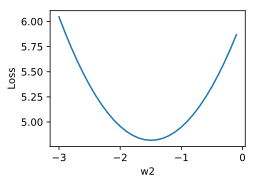

In [83]:
# plot2
w_list = []
mse_list = []
for w in np.arange(-3, 0, 0.1):
  l_sum = 0
  for x, y in zip(features[:,1], labels):
    l_sum += loss(np.dot(x, w)+true_b, torch.tensor(y))
  w_list.append(w)
  mse_list.append(l_sum/features.shape[0])

plt.plot(w_list, mse_list)
plt.xlabel('w2')
plt.ylabel('Loss')
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [84]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [85]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [86]:
next(iter(data_iter))

[tensor([[-0.1682, -0.9869],
         [-2.1991,  0.7339],
         [ 0.2386, -0.9247],
         [ 0.7914, -0.2355],
         [ 0.2199, -0.3225],
         [-0.8853,  1.0337],
         [ 0.2774,  1.3034],
         [-0.7586, -0.2666],
         [-0.3923,  1.0809],
         [ 0.6547,  1.7867],
         [ 0.4036, -0.0880],
         [ 1.1924, -0.3469],
         [-0.8087, -2.4857],
         [-0.0667,  0.2165],
         [-0.4943, -0.5371],
         [-0.0081,  1.2841],
         [ 0.9278, -1.2639],
         [-1.4089,  0.1786],
         [ 0.8264,  1.1416],
         [-0.6831,  0.1934]]), tensor([[ 6.4934],
         [-2.2001],
         [ 7.5934],
         [ 8.2236],
         [ 6.6579],
         [ 1.2823],
         [ 4.3707],
         [ 3.6193],
         [ 2.6995],
         [ 4.7735],
         [ 6.8277],
         [ 9.5932],
         [ 6.8076],
         [ 4.9722],
         [ 4.8072],
         [ 3.5464],
         [10.1818],
         [ 1.0016],
         [ 6.2876],
         [ 3.1597]])]

In [88]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [90]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [91]:
loss = nn.MSELoss()

In [92]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [93]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000251
epoch 2, loss 0.000101
epoch 3, loss 0.000101


In [98]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0005, -0.0001])
error in estimating b: tensor([0.0003])
